# Least square problem for polynomial regression 

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

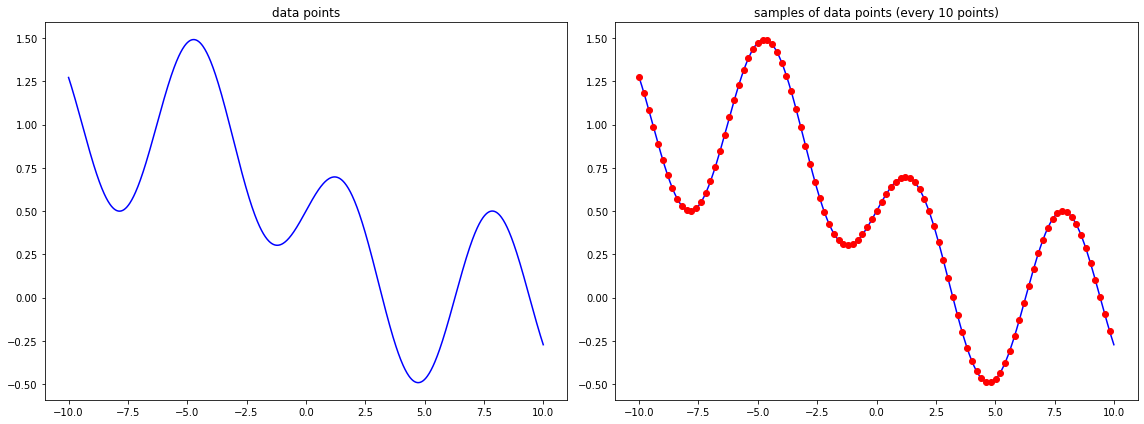

In [4]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [12]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A_ = []
    for power in range(0,p):
        B = []
        for point in x:
            point = np.array(point)
           
            B.append(np.power(point, power))
        A_.append(B)
    A = np.transpose(np.array(A_))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A


## construct vector $b$

In [14]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i, yy in enumerate(y):
        b[i] = yy
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b


## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [19]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    A = construct_matrix_A(x,p)
    AT = np.transpose(A)
    b = construct_vector_b(y)

    z = np.matmul(np.matmul(np.linalg.inv(np.matmul(AT,A)),AT),b)
    norm = 0 
    zz = np.matmul(A, z) - b
    for zzz in zz:
        norm += np.power(zzz, 2)
    loss = norm /(2*len(x))    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss
solve_regression(x,y,2)

(array([[ 0.5       ],
        [-0.06081363]]),
 array([0.07027885]))

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [20]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    AT = np.transpose(A)
    n = len(x)
    I = np.identity(len(np.matmul(AT,A)))
    b = construct_vector_b(y)

    z = np.matmul(np.matmul(np.linalg.inv(np.matmul(AT,A)+ n*alpha*I),AT),b)
    norm1 = 0 
    zz = np.matmul(A, z) - b
    for zzz in zz:
        norm1 += np.power(zzz, 2)
    loss1 = norm1 /(2*len(x))    
    
    norm2 = 0 
    for zz in z:
        norm2 += np.power(zz, 2)
    loss2 = norm2 /(2*len(x)) * alpha
    loss = loss1 + loss2 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss
solve_regression_with_regularization(x,y,2,3)

(array([[ 0.125     ],
        [-0.05580153]]),
 array([0.14103898]))

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [24]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x, p)
    z_ , loss=  solve_regression(x, y, p)
    y_hat = np.matmul(A, z_)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [26]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    A = construct_matrix_A(x, p)
    z_ , loss=  solve_regression_with_regularization(x, y, p, alpha)
    y_hat = np.matmul(A, z_)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


___

___

## functions for presenting the results

___

___

In [27]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [28]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [29]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [30]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [31]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [32]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [33]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [34]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [35]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [36]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [37]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [38]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [39]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [40]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [41]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


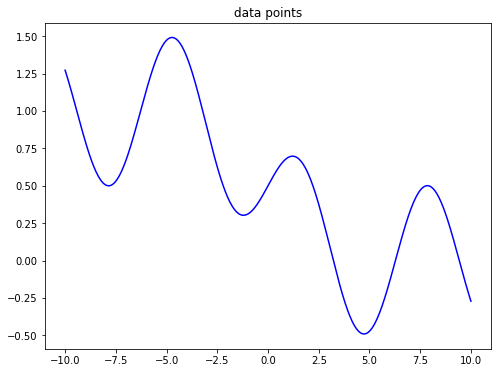

**************************************************
## [RESULT 02]
**************************************************


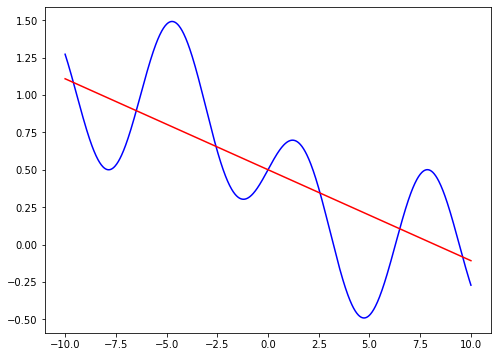

**************************************************
## [RESULT 03]
**************************************************


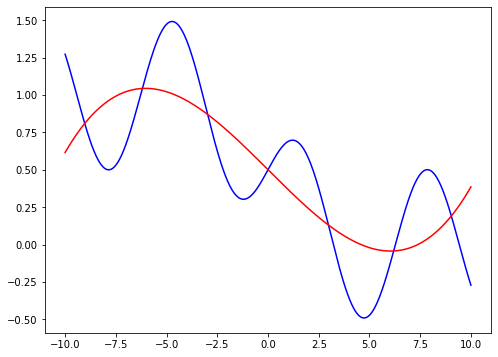

**************************************************
## [RESULT 04]
**************************************************


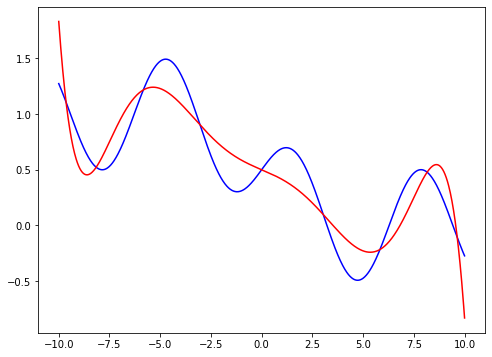

**************************************************
## [RESULT 05]
**************************************************


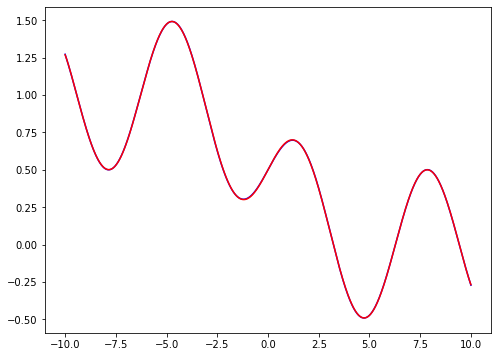

**************************************************
## [RESULT 06]
**************************************************


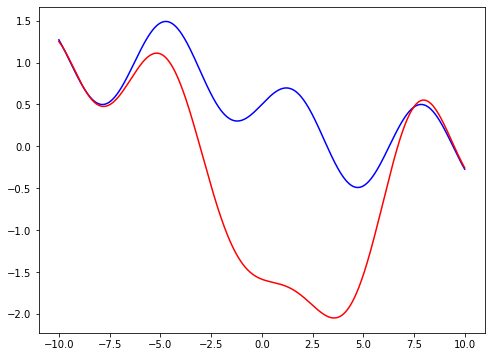

**************************************************
## [RESULT 07]
**************************************************


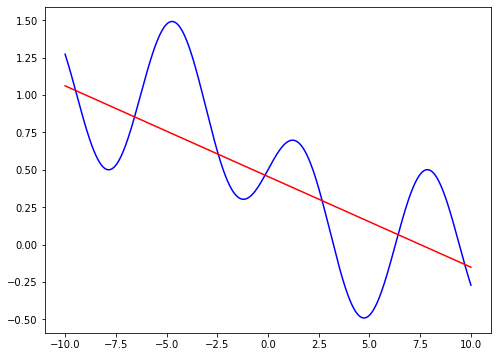

**************************************************
## [RESULT 08]
**************************************************


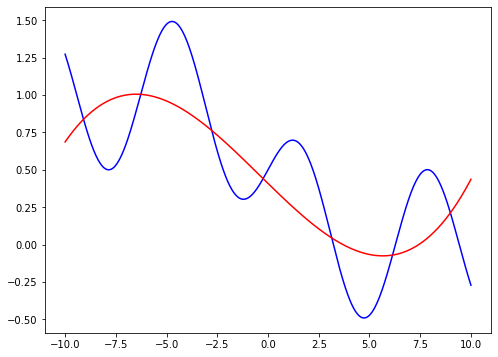

**************************************************
## [RESULT 09]
**************************************************


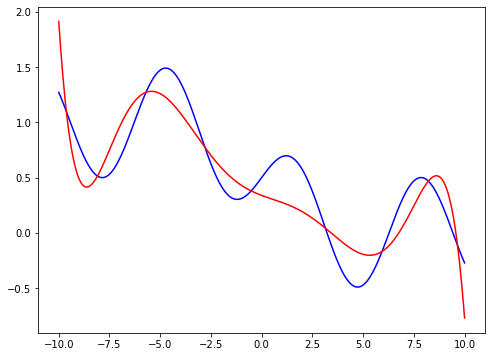

**************************************************
## [RESULT 10]
**************************************************


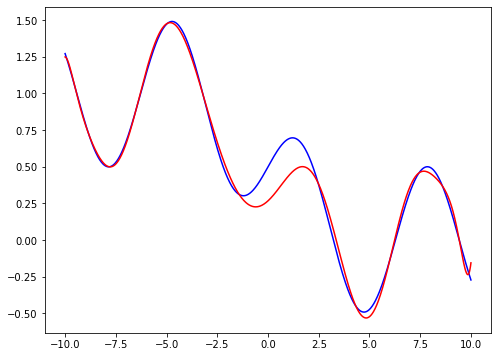

**************************************************
## [RESULT 11]
**************************************************


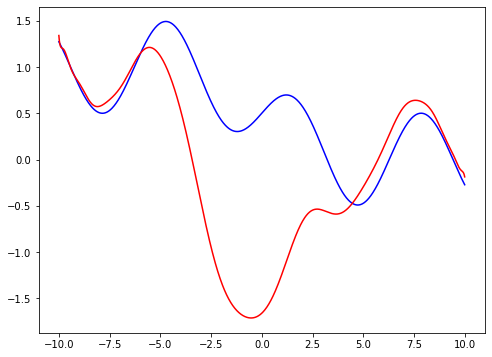

**************************************************
## [RESULT 12]
**************************************************
loss =  [0.05269781]
**************************************************
## [RESULT 13]
**************************************************
loss =  [1.2082059e-06]
**************************************************
## [RESULT 14]
**************************************************
loss =  [0.05459752]
**************************************************
## [RESULT 15]
**************************************************
loss =  [0.00365917]


In [43]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)